In [41]:
!pip install mlflow causalml imblearn xgboost lightgbm pyngrok statsmodels skimpy pyngrok arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 15.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as sp
import statsmodels
from pyngrok import ngrok
from warnings import filterwarnings; filterwarnings("ignore")
import skimpy as sk
import mlflow
import mlflow.sklearn
import mlflow.pyfunc

from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold



import joblib

In [3]:
df = pd.read_csv("train_pd.csv", low_memory=True)

In [4]:
df

,survey_id,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,100000,1,75,4,594.80627,Female,1,0,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
1,100000,1,150,4,1676.27230,Female,2,0,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
2,100000,1,375,4,506.93719,Male,5,0,0,2,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
3,100000,1,375,4,824.61786,Male,5,0,0,1,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
4,100000,1,525,4,351.47644,Male,7,1,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48879,200000,1,4168,1,716.10284,Male,4,1,1,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48880,200000,1,1042,1,1013.95100,Male,1,0,0,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48881,200000,1,4168,1,944.24182,Male,4,0,1,1,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48882,200000,1,2452,1,703.42847,Male,4,0,2,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805


In [5]:
df.isnull().sum()

,0
survey_id,0
com,0
weight,0
strata,0
utl_exp_ppp17,0
...,...
pct_hh_below_14.03,1
pct_hh_below_15.64,1
pct_hh_below_17.76,1
pct_hh_below_20.99,1


In [6]:
df.columns

Index(['survey_id', 'com', 'weight', 'strata', 'utl_exp_ppp17', 'male',
       'hsize', 'num_children5', 'num_children10', 'num_children18',
       ...
       'pct_hh_below_9.13', 'pct_hh_below_9.87', 'pct_hh_below_10.70',
       'pct_hh_below_11.62', 'pct_hh_below_12.69', 'pct_hh_below_14.03',
       'pct_hh_below_15.64', 'pct_hh_below_17.76', 'pct_hh_below_20.99',
       'pct_hh_below_27.37'],
      dtype='object', length=107)

In [7]:
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 48884  │ │ string      │ 64    │                                                          │
│ │ Number of columns │ 107    │ │ float64     │ 24    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 19    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA ┃ NA %      ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ survey_id │  0 │         0 │  134200 │    47420 │  100000 │  100000 │  100000 │  200000 │  200000 │ █    ▄ │  │
│ │ com       │  0 │         0 │       1 │        0 │       1 │       1 │       1 │       1 │       1 │     █  │  │
│ │ weight    │  0 │         0 │   956.2 │     1074 │       3 │     309 │     642 │    1180 │   23830 │   █    │  │
│ │ strata    │  0 │         0 │   4.503 │    2.455 │       1 │       2 │       5 │       7 │       8 │ ▇▁▂▃▁█ │  │
│ │ utl_exp_p │  0 │         0 │   492.3 │    423.7 │       0 │   175.7 │   392.9 │     703 │    5880 │   █▁   │  │
│ │ pp17      │    │           │         │          │         │         │         │         │         │        │  │
│ │ hsize     │  0 │         0 │   3.648 │    1.926 │       1 │       2 │       4 │       5 │      21 │   █▃   │  │
│ │ num_child │  0 │         0 │  0.2978 │   0.5696 │       0 │       0 │       0 │       0 │       5 │   █▂   │  │
│ │ ren5      │    │           │         │          │         │         │         │         │         │        │  │
│ │ num_child │  0 │         0 │  0.3447 │   0.6027 │       0 │       0 │       0 │       1 │       5 │  █▃▁   │  │
│ │ ren10     │    │           │         │          │         │         │         │         │         │        │  │
│ │ num_child │  0 │         0 │   0.586 │   0.8449 │       0 │       0 │       0 │       1 │       6 │  █▃▁   │  │
│ │ ren18     │    │           │         │          │         │         │         │         │         │        │  │
│ │ age       │  0 │         0 │   52.21 │    15.86 │      15 │      40 │      51 │      64 │      98 │ ▁▆█▆▃▁ │  │
│ │ num_adult │  0 │         0 │   1.119 │   0.7675 │       0 │       1 │       1 │       1 │       7 │   █▂   │  │
│ │ _female   │    │           │         │          │         │         │         │         │         │        │  │
│ │ num_adult │  0 │         0 │   1.043 │   0.8034 │       0 │       1 │       1 │       1 │       8 │   █▂   │  │
│ │ _male     │    │           │         │          │         │         │         │         │         │        │  │
│ │ num_elder │  0 │         0 │  0.2604 │   0.5455 │       0 │       0 │       0 │       0 │       4 │  █▂ ▁  │  │
│ │ ly        │    │           │         │          │         │         │         │         │         │        │  │
│ │ sworkersh │  0 │         0 │  0.8617 │   0.3876 │       0 │     0.6 │       1 │       1 │       4 │  ▃█▁   │  │
│ │ h         │    │           │         │          │   

## Data Visualization

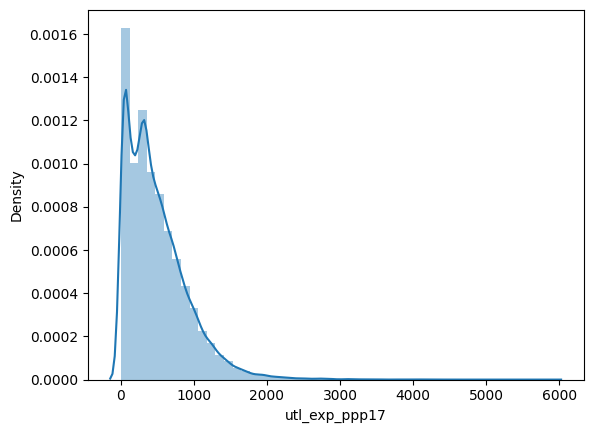

In [8]:
#Normal Distribution of Dta
sns.distplot(df["utl_exp_ppp17"])
#plt.savefig("distplot.png")
plt.show()

In [9]:
#Pairwise Plot
#sns.pairplot(df)
#plt.savefig("pairplot.png")
#plt.show()

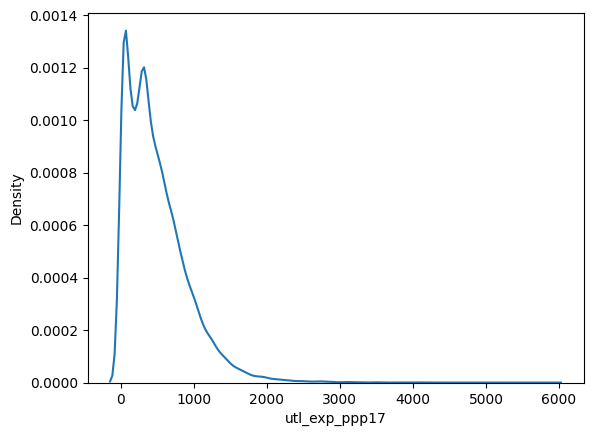

In [10]:
#KDE Plot
sns.kdeplot(df["utl_exp_ppp17"])
plt.savefig("kdeplot.png")
plt.show()

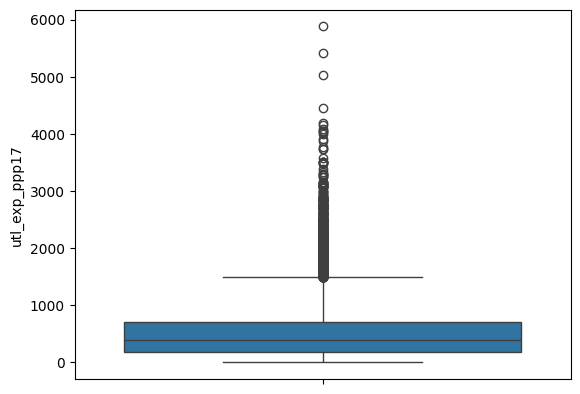

In [11]:
#Showing Outliers
sns.boxplot(df["utl_exp_ppp17"])
plt.savefig("boxplot.png")
plt.show()

#Feature Engineering

In [12]:
str_features = [column for column in df.columns if df[column].dtype == "object"]

for column in str_features:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[[column]])


In [13]:
df

,survey_id,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,100000,1,75,4,594.80627,0,1,0,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
1,100000,1,150,4,1676.27230,0,2,0,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
2,100000,1,375,4,506.93719,1,5,0,0,2,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
3,100000,1,375,4,824.61786,1,5,0,0,1,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
4,100000,1,525,4,351.47644,1,7,1,0,0,...,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48879,200000,1,4168,1,716.10284,1,4,1,1,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48880,200000,1,1042,1,1013.95100,1,1,0,0,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48881,200000,1,4168,1,944.24182,1,4,0,1,1,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
48882,200000,1,2452,1,703.42847,1,4,0,2,0,...,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805


In [23]:
preds = ["pct_hh_below_3.17", "pct_hh_below_3.94", "pct_hh_below_4.60", "pct_hh_below_5.26", "pct_hh_below_5.88", "pct_hh_below_6.47", "pct_hh_below_7.06", "pct_hh_below_7.70", "pct_hh_below_8.40", "pct_hh_below_9.13", "pct_hh_below_9.87", "pct_hh_below_10.70", "pct_hh_below_11.62", "pct_hh_below_12.69", "pct_hh_below_14.03", "pct_hh_below_15.64", "pct_hh_below_17.76", "pct_hh_below_20.99", "pct_hh_below_27.37"]

for column in preds:
  imputer = SimpleImputer(strategy="most_frequent")
  df[column] = imputer.fit_transform(df[[column]])

## Modelling

In [14]:
#Just seeing the actual count of columns
for column in df.columns:
  print(column + "\n")

survey_id

com

weight

strata

utl_exp_ppp17

male

hsize

num_children5

num_children10

num_children18

age

owner

water

toilet

sewer

elect

water_source

sanitation_source

dweltyp

num_adult_female

num_adult_male

num_elderly

employed

sworkershh

share_secondary

educ_max

sfworkershh

any_nonagric

sector1d

region1

region2

region3

region4

region5

region6

region7

urban

consumed100

consumed200

consumed300

consumed400

consumed500

consumed600

consumed700

consumed800

consumed900

consumed1000

consumed1100

consumed1200

consumed1300

consumed1400

consumed1500

consumed1600

consumed1700

consumed1800

consumed1900

consumed2000

consumed2100

consumed2200

consumed2300

consumed2400

consumed2500

consumed2600

consumed2700

consumed2800

consumed2900

consumed3000

consumed3100

consumed3200

consumed3300

consumed3400

consumed3500

consumed3600

consumed3700

consumed3800

consumed3900

consumed4000

consumed4100

consumed4200

consumed4300

consumed4400



In [22]:
df.isnull().sum()

,0
survey_id,0
com,0
weight,0
strata,0
utl_exp_ppp17,0
...,...
pct_hh_below_14.03,1
pct_hh_below_15.64,1
pct_hh_below_17.76,1
pct_hh_below_20.99,1


In [88]:
X = df.drop(columns=["pct_hh_below_3.17", "pct_hh_below_3.94", "pct_hh_below_4.60", "pct_hh_below_5.26", "pct_hh_below_5.88", "pct_hh_below_6.47", "pct_hh_below_7.06", "pct_hh_below_7.70", "pct_hh_below_8.40", "pct_hh_below_9.13", "pct_hh_below_9.87", "pct_hh_below_10.70", "pct_hh_below_11.62", "pct_hh_below_12.69", "pct_hh_below_14.03", "pct_hh_below_15.64", "pct_hh_below_17.76", "pct_hh_below_20.99", "pct_hh_below_27.37"], axis=1)
y = df[["pct_hh_below_3.17", "pct_hh_below_3.94", "pct_hh_below_4.60", "pct_hh_below_5.26", "pct_hh_below_5.88", "pct_hh_below_6.47", "pct_hh_below_7.06", "pct_hh_below_7.70", "pct_hh_below_8.40", "pct_hh_below_9.13", "pct_hh_below_9.87", "pct_hh_below_10.70", "pct_hh_below_11.62", "pct_hh_below_12.69", "pct_hh_below_14.03", "pct_hh_below_15.64", "pct_hh_below_17.76", "pct_hh_below_20.99", "pct_hh_below_27.37"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
#Models
xgb = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("model", MultiOutputRegressor(XGBRegressor(
      booster="gbtree",
      eta=0.01,
      n_estimators=1500,
      max_depth=4,
      min_child_weight=5,
      subsample=0.8,
      colsample_bytree=0.8,
      gamma=0.1,
      reg_alpha=0.5,
      reg_lambda=2.0,
      tree_method="hist"
  )))
])

lgb = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("model", MultiOutputRegressor(LGBMRegressor(
      boosting_type="gbdt",
      objective="regression",
      learning_rate=0.01,
      n_estimators=2000,
      num_leaves=64,
      max_depth=-1,
      min_data_in_leaf=50,
      feature_fraction=0.8,
      bagging_fraction=0.8,
      bagging_freq=5,
      lambda_l1=1.0,
      lambda_l2=2.0,
      min_gain_to_split=0.01,
      max_bin=255,
      linear_tree=False,
      verbose=-1
  )))
])



In [90]:
with mlflow.start_run():
  models = {
      "XGBoost": xgb,
      "LightGBM": lgb
  }
  for name, model in zip(models.keys(), models.values()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name} - R2: {r2}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    mlflow.log_metric(f"{name}_r2", r2)
    mlflow.log_metric(f"{name}_mae", mae)
    mlflow.log_metric(f"{name}_mse", mse)
mlflow.end_run()

XGBoost - R2: 0.7379651069641113, MAE: 0.0016256426461040974, MSE: 3.0081996555963997e-06, RMSE: 0.001734416229051262
LightGBM - R2: 0.9225008835245451, MAE: 0.000596380098060497, MSE: 3.9511658303260526e-07, RMSE: 0.0006285829961370299


## Statistical Test

In [34]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

scores = {model_name: [] for model_name in models}

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        fold_stats = round(np.sqrt(mean_squared_error(y_test, preds)), 4)
        scores[name].append(fold_stats)

In [35]:
print(scores)

{'XGBoost': [np.float64(0.0017), np.float64(0.0017), np.float64(0.0017), np.float64(0.0017), np.float64(0.0017), np.float64(0.0017)], 'LightGBM': [np.float64(0.0006), np.float64(0.0006), np.float64(0.0006), np.float64(0.0006), np.float64(0.0006), np.float64(0.0006)]}


In [36]:
#Pairwise Nemanyi-Post Hoc Test
y_true = y_test.values
pred_lgbm = lgb.predict(X_test)
pred_xgb = xgb.predict(X_test)

err_lgbm = y_true - pred_lgbm
err_xgb = y_true - pred_xgb

err_lgbm = np.mean((y_true - pred_lgbm)**2, axis=1)
err_xgb = np.mean((y_true - pred_xgb)**2, axis=1)

In [37]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(err_xgb, err_lgbm)
print("t =", t_stat, "p =", p_val)

t = 135.52474019341193 p = 0.0


In [38]:
#Wilcoxxon Signed Rank Test
from scipy.stats import wilcoxon

w_stat, p_val = wilcoxon(err_xgb, err_lgbm)
print("w =", w_stat, "p =", p_val)

w = 0.0 p = 0.0


In [39]:
wins = (np.abs(err_lgbm) < np.abs(err_xgb)).sum()
loss = (np.abs(err_lgbm) > np.abs(err_xgb)).sum()
ties = len(err_lgbm) - wins - loss

print(f"Wins: {wins}, Losses: {loss}, Ties: {ties}")

Wins: 8147, Losses: 0, Ties: 0


In [48]:
#Diebold Mariano Test
from scipy.stats import t

def dm_test(e1, e2, h=1):
    e1 = np.asarray(e1)
    e2 = np.asarray(e2)

    d = e1 - e2
    T = len(d)
    d_bar = np.mean(d)

    # Newey–West autocovariance (for forecast horizon h)
    if h > 1:
        gamma = [np.cov(d[:-lag], d[lag:])[0, 1] for lag in range(1, h)]
        var_d = (np.var(d, ddof=1) + 2 * np.sum(gamma)) / T
    else:
        # IID case — safest for ML
        var_d = np.var(d, ddof=1) / T

    DM = d_bar / np.sqrt(var_d)

    p_value = 2 * (1 - t.cdf(np.abs(DM), df=T-1))

    return DM, p_value


dm_stat, p_val = dm_test(err_xgb, err_lgbm)
print(dm_stat, p_val)

135.52474019341196 0.0


In [50]:
#Rmaining Tests
# 1. Mean Error Reduction (%)
mean_reduction = ((err_xgb.mean() - err_lgbm.mean()) / err_xgb.mean()) * 100

# 2. Cohen's d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std if pooled_std > 0 else np.inf

d = cohens_d(err_xgb, err_lgbm)

# 3. Cliff's Delta
def cliffs_delta(x, y):
    n = len(x)
    m = len(y)
    greater, less = 0, 0

    for i in range(n):
        for j in range(m):
            if x[i] > y[j]:
                greater += 1
            elif x[i] < y[j]:
                less += 1

    return (greater - less) / (n * m)

delta = cliffs_delta(err_xgb, err_lgbm)

print(f"Mean Error Reduction (%): {mean_reduction:.4f}%")
print(f"Cohen's d: {d}")
print(f"Cliff's Delta: {delta}")

Mean Error Reduction (%): 86.8891%
Cohen's d: 1.829349710512627
Cliff's Delta: 1.0


## Stress Testing

In [52]:
from sklearn.utils import resample

def stress_test(model, X, y, n_samples_list=[0.1, 0.25, 0.5, 0.75, 1.0],
                noise_levels=[0.01, 0.05, 0.1], n_random_feats=[5, 10, 20]):
    """
    Stress test a multi-output regressor with:
    1. Sample size reduction
    2. Label noise
    3. Feature corruption (random features)

    Returns:
        DataFrame of stress test results
    """
    results = []

    # Original evaluation
    y_pred = model.predict(X)
    results.append({
        "stressor": "baseline",
        "param": "none",
        "mae": mean_absolute_error(y, y_pred),
        "mse": mean_squared_error(y, y_pred),
        "r2": r2_score(y, y_pred)
    })

    #Sample size reduction
    for frac in n_samples_list:
        X_sample, y_sample = resample(X, y, n_samples=int(len(X)*frac), random_state=42)
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X)
        results.append({
            "stressor": "sample_size",
            "param": frac,
            "mae": mean_absolute_error(y, y_pred),
            "mse": mean_squared_error(y, y_pred),
            "r2": r2_score(y, y_pred)
        })

    #Label noise
    for noise in noise_levels:
        y_noisy = y + np.random.normal(0, noise*y.std(), size=y.shape)
        model.fit(X, y_noisy)
        y_pred = model.predict(X)
        results.append({
            "stressor": "label_noise",
            "param": noise,
            "mae": mean_absolute_error(y, y_pred),
            "mse": mean_squared_error(y, y_pred),
            "r2": r2_score(y, y_pred)
        })

    #Feature corruption: add random features
    for n_feat in n_random_feats:
        X_aug = X.copy()
        for i in range(n_feat):
            X_aug[f"rand_feat_{i}"] = np.random.normal(0, 1, size=X.shape[0])
        model.fit(X_aug, y)
        y_pred = model.predict(X_aug)
        results.append({
            "stressor": "feature_corruption",
            "param": n_feat,
            "mae": mean_absolute_error(y, y_pred),
            "mse": mean_squared_error(y, y_pred),
            "r2": r2_score(y, y_pred)
        })

    return pd.DataFrame(results)



lgbm_stress = stress_test(lgb, X_test, y_test)
xgb_stress  = stress_test(xgb, X_test, y_test)

# Compare results
print("LGBM Stress Test:")
print(lgbm_stress)

print("\nXGB Stress Test:")
print(xgb_stress)

LGBM Stress Test:
              stressor param       mae           mse        r2
0             baseline  none  0.000581  3.749348e-07  0.926289
1          sample_size   0.1  0.004205  2.250873e-05  0.001672
2          sample_size  0.25  0.003180  1.225757e-05  0.307642
3          sample_size   0.5  0.002112  5.248062e-06  0.620370
4          sample_size  0.75  0.001663  3.205242e-06  0.725934
5          sample_size   1.0  0.001415  2.307377e-06  0.774614
6          label_noise  0.01  0.001413  2.281716e-06  0.776385
7          label_noise  0.05  0.001410  2.273371e-06  0.776600
8          label_noise   0.1  0.001411  2.275310e-06  0.776400
9   feature_corruption     5  0.001412  2.278930e-06  0.776280
10  feature_corruption    10  0.001410  2.274296e-06  0.776241
11  feature_corruption    20  0.001412  2.278827e-06  0.776340

XGB Stress Test:
              stressor param       mae       mse        r2
0             baseline  none  0.001587  0.000003  0.744839
1          sample_size   0.

## Impossibility Testing

## Re Run The Training Models again for use

In [58]:
from copy import deepcopy

def impossibility_test(model, X, y, noise_levels=[0.1, 0.5, 1.0],
                       outlier_factor=10, flip_fraction=0.1):
    results = []

    # Make a copy to avoid modifying original
    X_orig = X.copy()

    # Baseline
    y_pred = model.predict(X_orig)
    results.append({
        "scenario": "baseline",
        "param": "none",
        "mae": mean_absolute_error(y, y_pred),
        "mse": mean_squared_error(y, y_pred),
        "r2": r2_score(y, y_pred)
    })

    # Random Noise
    for n in noise_levels:
        X_noisy = X_orig + np.random.normal(0, n * X_orig.std(), size=X_orig.shape)
        X_noisy = pd.DataFrame(X_noisy, columns=X_orig.columns)  # preserve names
        y_pred = model.predict(X_noisy)
        results.append({
            "scenario": "random_noise",
            "param": n,
            "mae": mean_absolute_error(y, y_pred),
            "mse": mean_squared_error(y, y_pred),
            "r2": r2_score(y, y_pred)
        })

    # Extreme Outliers
    X_outlier = X_orig.copy()
    X_outlier.iloc[0:int(0.01*len(X_outlier)), :] *= outlier_factor
    y_pred = model.predict(X_outlier)
    results.append({
        "scenario": "extreme_outliers",
        "param": outlier_factor,
        "mae": mean_absolute_error(y, y_pred),
        "mse": mean_squared_error(y, y_pred),
        "r2": r2_score(y, y_pred)
    })

    # Feature Flip
    X_flip = X_orig.copy()
    n_flip = int(flip_fraction * X_flip.shape[1])
    flip_idx = np.random.choice(X_flip.shape[1], n_flip, replace=False)
    X_flip.iloc[:, flip_idx] = X_flip.iloc[:, flip_idx].sample(frac=1).reset_index(drop=True)
    y_pred = model.predict(X_flip)
    results.append({
        "scenario": "feature_flip",
        "param": flip_fraction,
        "mae": mean_absolute_error(y, y_pred),
        "mse": mean_squared_error(y, y_pred),
        "r2": r2_score(y, y_pred)
    })

    # NaN Injection
    X_nan = X_orig.copy()
    nan_frac = 0.05
    n_nan = int(nan_frac * X_nan.size)
    nan_idx = (
        np.random.randint(0, X_nan.shape[0], n_nan),
        np.random.randint(0, X_nan.shape[1], n_nan)
    )
    X_nan.values[nan_idx] = np.nan
    y_pred = model.predict(X_nan.fillna(X_nan.mean()))
    results.append({
        "scenario": "nan_injection",
        "param": nan_frac,
        "mae": mean_absolute_error(y, y_pred),
        "mse": mean_squared_error(y, y_pred),
        "r2": r2_score(y, y_pred)
    })

    return pd.DataFrame(results)



lgbm_results = impossibility_test(lgb, X_test, y_test)
xgb_results  = impossibility_test(xgb,  X_test, y_test)

print("LGBM Impossibility Test:\n", lgbm_results)
print("\nXGB Impossibility Test:\n", xgb_results)


LGBM Impossibility Test:
            scenario param       mae           mse        r2
0          baseline  none  0.000581  3.749348e-07  0.926289
1      random_noise   0.1  0.003308  2.912211e-05 -0.227491
2      random_noise   0.5  0.003296  2.899899e-05 -0.222497
3      random_noise   1.0  0.003360  2.971015e-05 -0.251505
4  extreme_outliers    10  0.000662  1.228877e-06  0.892048
5      feature_flip   0.1  0.000581  3.749348e-07  0.926289
6     nan_injection  0.05  0.000581  3.749348e-07  0.926289

XGB Impossibility Test:
            scenario param       mae       mse        r2
0          baseline  none  0.001587  0.000003  0.744839
1      random_noise   0.1  0.002559  0.000015  0.294157
2      random_noise   0.5  0.002586  0.000015  0.281415
3      random_noise   1.0  0.002620  0.000016  0.271240
4  extreme_outliers    10  0.001645  0.000003  0.723264
5      feature_flip   0.1  0.001587  0.000003  0.744839
6     nan_injection  0.05  0.001587  0.000003  0.744839


## Model Interpretability w/ SHAP

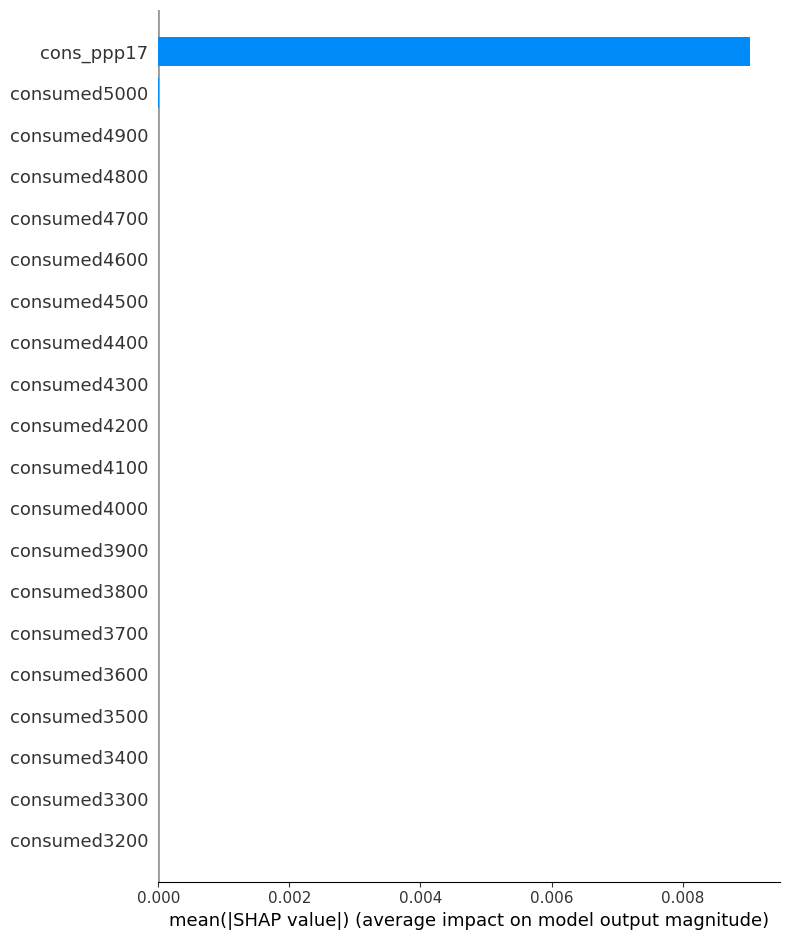

In [62]:
import shap
def shap_multioutput_tree(multi_model, X, top_n=20):
    """
    Compute SHAP values for a MultiOutputRegressor wrapping a tree-based model.
    """
    shap_dfs = []

    for i, estimator in enumerate(multi_model.estimators_):  # loop over outputs
        explainer = shap.TreeExplainer(estimator)
        shap_values = explainer.shap_values(X)
        mean_abs_shap = np.abs(shap_values).mean(axis=0)

        df = pd.DataFrame({
            "feature": X.columns,
            "shap_value": mean_abs_shap,
            "output": f"target_{i}"
        }).sort_values("shap_value", ascending=False)

        shap.summary_plot(shap_values, X, plot_type="bar", max_display=top_n, show=False)
        shap_dfs.append(df)

    return pd.concat(shap_dfs).reset_index(drop=True)


shap_lgbm = shap_multioutput_tree(lgb.named_steps["model"], X_test)
shap_xgb  = shap_multioutput_tree(xgb.named_steps["model"], X_test)

In [63]:
shap_lgbm

,feature,shap_value,output
0,survey_id,0.00443,target_0
1,com,0.00000,target_0
2,weight,0.00000,target_0
3,strata,0.00000,target_0
4,utl_exp_ppp17,0.00000,target_0
...,...,...,...
1667,consumed4700,0.00000,target_18
1668,consumed4800,0.00000,target_18
1669,consumed4900,0.00000,target_18
1670,consumed5000,0.00000,target_18


In [64]:
shap_xgb

,feature,shap_value,output
0,survey_id,0.002846,target_0
1,com,0.000000,target_0
2,weight,0.000000,target_0
3,strata,0.000000,target_0
4,utl_exp_ppp17,0.000000,target_0
...,...,...,...
1667,consumed4700,0.000000,target_18
1668,consumed4800,0.000000,target_18
1669,consumed4900,0.000000,target_18
1670,consumed5000,0.000000,target_18


## Causal Inference

In [78]:
# Features & outcome
X = df.drop(columns=["cons_ppp17"])
y = df["cons_ppp17"]

# Binary treatment
T = df["male"].astype(int)

# Impute missing values
imp = SimpleImputer(strategy="mean")
X_imp = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_val, y_train, y_val, T_train, T_val = train_test_split(
    X_imp, y.values, T.values, test_size=0.2, random_state=42
)

In [79]:
from causalml.optimize import PolicyLearner
from sklearn.tree import DecisionTreeClassifier

policy_learner = PolicyLearner(
    outcome_learner=LGBMRegressor(n_estimators=200, learning_rate=0.03),
    treatment_learner=XGBRegressor(
        n_estimators=200,
        learning_rate=0.03,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    policy_learner=DecisionTreeClassifier(max_depth=3),
    n_fold=5,
    random_state=42
)

policy_learner.fit(X_train.values, T_train, y_train)

recommended_T_val = policy_learner.predict(X_val.values)
print("Recommended treatments (first 10):", recommended_T_val[:10])

Recommended treatments (first 10): [-1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]


## A/B Testing

In [80]:
from scipy.stats import ttest_ind, mannwhitneyu

def bootstrap_ci(x, y, func=np.mean, n_boot=1000, ci=95):
    """Bootstrap confidence interval for the difference of func(x) - func(y)"""
    boot_diffs = []
    for _ in range(n_boot):
        x_sample = np.random.choice(x, size=len(x), replace=True)
        y_sample = np.random.choice(y, size=len(y), replace=True)
        boot_diffs.append(func(x_sample) - func(y_sample))
    lower = np.percentile(boot_diffs, (100 - ci)/2)
    upper = np.percentile(boot_diffs, 100 - (100 - ci)/2)
    return lower, upper

def cliffs_delta(x, y):
    """Cliff's Delta for effect size"""
    n1, n2 = len(x), len(y)
    more = np.sum([xi > y for xi in x])
    less = np.sum([xi < y for xi in x])
    delta = (more - less) / (n1 * n2)
    return delta

def cohens_d(x, y):
    """Cohen's d for standardized mean difference"""
    nx1, nx2 = len(x), len(y)
    dof = nx1 + nx2 - 2
    pooled_std = np.sqrt(((nx1 - 1)*x.std()**2 + (nx2 - 1)*y.std()**2) / dof)
    return (x.mean() - y.mean()) / pooled_std


def ab_test(df, treatment_col, outcome_cols, n_boot=1000):
    results = []

    for outcome in outcome_cols:
        x = df[outcome]
        T = df[treatment_col]

        y_treated   = x[T == 1]
        y_untreated = x[T == 0]

        # Parametric t-test
        t_stat, p_val = ttest_ind(y_treated, y_untreated, equal_var=False)

        # Non-parametric Mann-Whitney U
        u_stat, p_val_u = mannwhitneyu(y_treated, y_untreated, alternative='two-sided')

        # Bootstrapped CI
        ci_lower, ci_upper = bootstrap_ci(y_treated, y_untreated, func=np.mean, n_boot=n_boot)

        # Effect sizes
        d = cohens_d(y_treated, y_untreated)
        delta = cliffs_delta(y_treated.values, y_untreated.values)

        results.append({
            "Outcome": outcome,
            "Treated_mean": y_treated.mean(),
            "Untreated_mean": y_untreated.mean(),
            "Mean_diff": y_treated.mean() - y_untreated.mean(),
            "T-stat": t_stat,
            "P-val_t": p_val,
            "U-stat": u_stat,
            "P-val_u": p_val_u,
            "CI_lower": ci_lower,
            "CI_upper": ci_upper,
            "Cohen_d": d,
            "Cliffs_delta": delta
        })

    return pd.DataFrame(results)


In [81]:
outcome_cols = ["pct_hh_below_3.17", "pct_hh_below_3.94", "pct_hh_below_4.60", "pct_hh_below_5.26", "pct_hh_below_5.88", "pct_hh_below_6.47", "pct_hh_below_7.06", "pct_hh_below_7.70", "pct_hh_below_8.40", "pct_hh_below_9.13", "pct_hh_below_9.87", "pct_hh_below_10.70", "pct_hh_below_11.62", "pct_hh_below_12.69", "pct_hh_below_14.03", "pct_hh_below_15.64", "pct_hh_below_17.76", "pct_hh_below_20.99", "pct_hh_below_27.37"]

ab_results = ab_test(df, treatment_col="male", outcome_cols=outcome_cols, n_boot=2000)
print(ab_results)

               Outcome  Treated_mean  Untreated_mean  Mean_diff    T-stat  \
0    pct_hh_below_3.17      0.064665        0.064491   0.000174  4.432933   
1    pct_hh_below_3.94      0.116454        0.116293   0.000160  4.455147   
2    pct_hh_below_4.60      0.166251        0.166017   0.000235  4.417362   
3    pct_hh_below_5.26      0.218470        0.218252   0.000218  4.417362   
4    pct_hh_below_5.88      0.268722        0.268539   0.000183  4.417362   
5    pct_hh_below_6.47      0.316957        0.316788   0.000169  4.417362   
6    pct_hh_below_7.06      0.363167        0.362964   0.000203  4.417362   
7    pct_hh_below_7.70      0.415725        0.415462   0.000263  4.417362   
8    pct_hh_below_8.40      0.468764        0.468591   0.000173  4.417362   
9    pct_hh_below_9.13      0.520149        0.519915   0.000234  4.417362   
10   pct_hh_below_9.87      0.569359        0.569034   0.000325  4.417362   
11  pct_hh_below_10.70      0.618472        0.618176   0.000297  4.417362   

## Generating Test Set Predictions

In [98]:
test_df = pd.read_csv("/content/test_hh_features.csv")
test_df

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4200,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id
0,400001,1,320,4,567.80914,Female,4,0,1,0,...,No,No,No,No,No,Yes,Yes,Yes,No,400000
1,400002,1,480,4,561.70367,Female,6,0,1,1,...,Yes,No,No,No,No,Yes,Yes,Yes,No,400000
2,400003,1,320,4,183.16423,Male,4,0,0,0,...,Yes,No,Yes,No,Yes,Yes,No,Yes,No,400000
3,400004,1,320,4,696.02411,Male,4,0,0,1,...,Yes,Yes,No,No,No,Yes,Yes,No,No,400000
4,400005,1,320,4,286.95731,Male,4,0,0,1,...,Yes,No,No,No,No,No,Yes,No,No,400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103018,634209,1,963,8,402.71024,Male,3,0,0,0,...,Yes,No,No,Yes,No,No,Yes,Yes,No,600000
103019,634210,1,2247,8,238.44685,Male,7,1,2,2,...,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,600000
103020,634211,1,963,8,211.95276,Male,3,0,0,1,...,Yes,No,No,Yes,No,No,Yes,Yes,No,600000
103021,634212,1,642,8,254.34331,Female,2,0,0,0,...,Yes,Yes,No,Yes,No,Yes,No,Yes,No,600000


In [99]:
test_df["cons_ppp17"] = np.log(df["cons_ppp17"])
str_features = [column for column in test_df.columns if test_df[column].dtype == "object"]

for column in str_features:
  encoder = LabelEncoder()
  test_df[column] = encoder.fit_transform(test_df[[column]])

In [100]:
test_df

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id,cons_ppp17
0,400001,1,320,4,567.80914,0,4,0,1,0,...,0,0,0,0,1,1,1,0,400000,1.172222
1,400002,1,480,4,561.70367,0,6,0,1,1,...,0,0,0,0,1,1,1,0,400000,1.041343
2,400003,1,320,4,183.16423,1,4,0,0,0,...,0,1,0,1,1,0,1,0,400000,0.961394
3,400004,1,320,4,696.02411,1,4,0,0,1,...,1,0,0,0,1,1,0,0,400000,0.679362
4,400005,1,320,4,286.95731,1,4,0,0,1,...,0,0,0,0,0,1,0,0,400000,0.920410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103018,634209,1,963,8,402.71024,1,3,0,0,0,...,0,0,1,0,0,1,1,0,600000,NaN
103019,634210,1,2247,8,238.44685,1,7,1,2,2,...,1,0,1,0,1,1,1,0,600000,NaN
103020,634211,1,963,8,211.95276,1,3,0,0,1,...,0,0,1,0,0,1,1,0,600000,NaN
103021,634212,1,642,8,254.34331,0,2,0,0,0,...,1,0,1,0,1,0,1,0,600000,NaN


In [103]:
X.columns

Index(['survey_id', 'com', 'weight', 'strata', 'utl_exp_ppp17', 'male',
       'hsize', 'num_children5', 'num_children10', 'num_children18', 'age',
       'owner', 'water', 'toilet', 'sewer', 'elect', 'water_source',
       'sanitation_source', 'dweltyp', 'num_adult_female', 'num_adult_male',
       'num_elderly', 'employed', 'sworkershh', 'share_secondary', 'educ_max',
       'sfworkershh', 'any_nonagric', 'sector1d', 'region1', 'region2',
       'region3', 'region4', 'region5', 'region6', 'region7', 'urban',
       'consumed100', 'consumed200', 'consumed300', 'consumed400',
       'consumed500', 'consumed600', 'consumed700', 'consumed800',
       'consumed900', 'consumed1000', 'consumed1100', 'consumed1200',
       'consumed1300', 'consumed1400', 'consumed1500', 'consumed1600',
       'consumed1700', 'consumed1800', 'consumed1900', 'consumed2000',
       'consumed2100', 'consumed2200', 'consumed2300', 'consumed2400',
       'consumed2500', 'consumed2600', 'consumed2700', 'consumed280

In [107]:
multi_outcomes = ["pct_hh_below_3.17", "pct_hh_below_3.94", "pct_hh_below_4.60", "pct_hh_below_5.26", "pct_hh_below_5.88", "pct_hh_below_6.47", "pct_hh_below_7.06", "pct_hh_below_7.70", "pct_hh_below_8.40", "pct_hh_below_9.13", "pct_hh_below_9.87", "pct_hh_below_10.70", "pct_hh_below_11.62", "pct_hh_below_12.69", "pct_hh_below_14.03", "pct_hh_below_15.64", "pct_hh_below_17.76", "pct_hh_below_20.99", "pct_hh_below_27.37"]

X_test_new = test_df[X_train.columns]  # keep same columns/order as training

# Generate predictions
multi_preds_new = lgb.predict(X_test_new)

# Convert predictions to a DataFrame
multi_preds_df = pd.DataFrame(multi_preds_new, columns=multi_outcomes)

# Attach predictions to the test set if you want
test_df_with_preds = test_df.copy()
test_df_with_preds[multi_outcomes] = multi_preds_df

# View the first few rows
print(test_df_with_preds.head())

       hhid  com  weight  strata  utl_exp_ppp17  male  hsize  num_children5  \
0  400001.0  1.0   320.0     4.0      567.80914   0.0    4.0            0.0   
1  400002.0  1.0   480.0     4.0      561.70367   0.0    6.0            0.0   
2  400003.0  1.0   320.0     4.0      183.16423   1.0    4.0            0.0   
3  400004.0  1.0   320.0     4.0      696.02411   1.0    4.0            0.0   
4  400005.0  1.0   320.0     4.0      286.95731   1.0    4.0            0.0   

   num_children10  num_children18  ...  pct_hh_below_9.13  pct_hh_below_9.87  \
0             1.0             0.0  ...           0.513806           0.560231   
1             1.0             1.0  ...           0.513806           0.560231   
2             0.0             0.0  ...           0.513806           0.560231   
3             0.0             1.0  ...           0.513806           0.560231   
4             0.0             1.0  ...           0.513806           0.560231   

   pct_hh_below_10.70  pct_hh_below_11.62  p

In [113]:
survey_id = test_df["survey_id"].unique()

In [114]:
survey_id

array([400000., 500000., 600000.])

In [123]:
survey_ids = test_df["survey_id"].unique()

# Placeholder for predictions
multi_outcomes = [
    "pct_hh_below_3.17","pct_hh_below_3.94","pct_hh_below_4.60","pct_hh_below_5.26",
    "pct_hh_below_5.88","pct_hh_below_6.47","pct_hh_below_7.06","pct_hh_below_7.70",
    "pct_hh_below_8.40","pct_hh_below_9.13","pct_hh_below_9.87","pct_hh_below_10.70",
    "pct_hh_below_11.62","pct_hh_below_12.69","pct_hh_below_14.03","pct_hh_below_15.64",
    "pct_hh_below_17.76","pct_hh_below_20.99","pct_hh_below_27.37"
]

# Predict for each unique survey_id by taking the **mean of features per survey_id**
pred_list = []
for sid in survey_ids:
    # select all rows for this survey_id
    rows = test_df[test_df["survey_id"] == sid]

    # Take mean of features (or any aggregation that matches training)
    X_agg = rows[feature_cols].mean().values.reshape(1, -1)

    # Predict with your multi-output model
    pred = lgb.predict(X_agg)  # shape (1,19)

    pred_list.append(pred.flatten())

# Build submission DataFrame
submission_df = pd.DataFrame(pred_list, columns=multi_outcomes)
submission_df.insert(0, "survey_id", survey_ids)

In [124]:
submission_df

,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,400000.0,0.060196,0.112432,0.1599,0.212627,0.263973,0.312632,0.357785,0.408523,0.46432,0.513806,0.560329,0.610275,0.660185,0.708983,0.761828,0.809918,0.86122,0.907259,0.953682
1,500000.0,0.060196,0.112432,0.1599,0.212627,0.263973,0.312632,0.357785,0.408523,0.46432,0.513806,0.560329,0.610275,0.660185,0.708983,0.761828,0.809918,0.86122,0.907259,0.953682
2,600000.0,0.060196,0.112432,0.1599,0.212627,0.263973,0.312632,0.357785,0.408523,0.46432,0.513806,0.560329,0.610275,0.660185,0.708983,0.761828,0.809918,0.86122,0.907259,0.953682


In [126]:
submission_df.to_csv("predicted_poverty_distribution.csv", index=False)

In [110]:
with open("lgb_poverty_model.pkl", "wb") as f:
    joblib.dump(lgb, f)
